This is the second part of the project assigned to you.
The objective is the correctly classify some sources into stars, galaxies, and quasars using a combination of datasets from SDSS and from WISE.



For each question, you need to provide a textual answer with the associated programming code with the analysis and justification of your answer.

Every question counts for 2 points.

The two datasets used in this Project can be located in:

[df_wise.pkl](https://drive.google.com/file/d/1-Cu52dM6bgmiDpfoWINnTnDn9viR3Cd9/view?usp=sharing)

[df_sdss.pkl](https://drive.google.com/file/d/1-CIGdO6vAjhwqCmH88Cur6bWJDPBktZZ/view?usp=sharing)

Use the part 1 of the project to process them correctly to be used in this Part 2

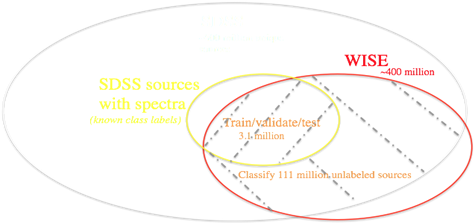

In [ ]:
import pickle
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
#Loading/saving python data objects
# The "name" is the path to the datasets without extension
def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(my_df):
    with open('/content/drive/My Drive/ML/Pro2/my_df' + '.pkl', 'rb') as f:
        return pickle.load(f)

In [ ]:
#0/ We will reuse here the dataset obtained after cleaning the dataset from Project Part 1 until question 9\
# Use the method 'save_obj' from the notebook Project 1 to save the clean the dataset as 'my_df.pkl'. Then use the method 'load_obj' in this notebook to load it here.
# This question is not graded, as we will provide 'my_df.pkl' on Moodle for people who didn't manage to finish Project Part 1

my_df = load_obj("my_df")
print(my_df)

        class      w1      w2      w3     w4  w1err  w2err     w3err  \
0           0  12.732  12.740  10.863  8.701  0.024  0.027     0.102   
1           0  14.818  14.601  11.572  8.763  0.036  0.069     0.177   
2           0  15.139  14.804  12.495  9.162  0.041  0.081     0.403   
3           1  17.401  16.137  12.453  9.203  0.212  0.239     0.395   
4           0  14.960  14.778  11.504  8.995  0.042  0.094     0.198   
...       ...     ...     ...     ...    ...    ...    ...       ...   
104931      0  16.620  16.309  12.123  8.564  0.127  0.336     0.384   
104932      2  16.479  16.002  12.812  8.901  0.099  0.204  9999.000   
104933      1  15.334  14.570  11.782  9.163  0.048  0.061     0.247   
104934      0  14.451  13.921  10.434  8.440  0.032  0.047     0.072   
104935      0  15.934  15.379  12.574  8.842  0.070  0.131     0.474   

           w4err  bossprimary  sdssprimary     specObjID                objid  \
0          0.357          0.0            1  5.348116e+

In [ ]:
#1/ Build new polynomial features up to order 3 using the following features

from sklearn.preprocessing import PolynomialFeatures

psf = ['psf_u', 'psf_g', 'psf_r', 'psf_i', 'psf_z']

psf_data = my_df[psf]

poly = PolynomialFeatures(degree=3)
poly_data = poly.fit_transform(psf_data)

columns = poly.get_feature_names_out(input_features=psf)
poly_df = pd.DataFrame(poly_data, columns=columns)

print(poly_df)

          1     psf_u     psf_g     psf_r     psf_i     psf_z     psf_u^2  \
0       1.0  20.28621  18.31815  17.49023  17.09882  16.62118  411.530316   
1       1.0  24.68405  22.86604  21.10678  20.61102  20.09156  609.302324   
2       1.0  24.75084  22.21462  20.75691  19.81021  19.33844  612.604081   
3       1.0  20.95170  20.38400  20.25592  19.93506  19.86297  438.973733   
4       1.0  22.41779  20.65702  19.68501  19.47346  19.25758  502.557308   
...     ...       ...       ...       ...       ...       ...         ...   
104931  1.0  20.68020  20.07105  20.46560  19.81989  20.08070  427.670672   
104932  1.0  20.14172  19.08772  18.64795  18.51453  18.39307  405.688885   
104933  1.0  20.76336  20.33770  20.33149  20.43184  20.11479  431.117118   
104934  1.0  21.18619  20.46147  19.28529  18.70957  18.30717  448.854647   
104935  1.0  22.34556  22.30135  21.55497  20.69381  20.30458  499.324052   

        psf_u psf_g  psf_u psf_r  psf_u psf_i  psf_u psf_z     psf_g^2  \
0

In [ ]:
#2/ Build new polynomial features up to order 3 using the features in psf (#1) and the new features from the variable wise below. Which of the new features are the most correlated with the column 'class'
# we call the list of these new features 'new_features'
wise = ['w1' ,'w2', 'w3', 'w4']

# Combine the provided features
all_features = psf + wise
all_features_data = my_df[all_features]

poly = PolynomialFeatures(degree=3)
poly_data = poly.fit_transform(all_features_data)

#new feature names
columns = poly.get_feature_names_out(input_features=all_features)
poly_df = pd.DataFrame(poly_data, columns=columns)

# Add the generated polynomial features
extended_df = pd.concat([my_df, poly_df], axis=1)

#correlation matrix
correlation_matrix = extended_df.corr()

#correlations of all features with 'class'
class_correlation = correlation_matrix['class']

# Remove the correlation of 'class' with itself
class_correlation = class_correlation.drop('class')

#most correlated new features
most_correlated_features = class_correlation.abs().nlargest(10)  # Adjust the number to get more/less features

# The new features
new_features = list(most_correlated_features.index.difference(all_features))

print(new_features)

['psf_u psf_g', 'psf_u psf_i', 'psf_u psf_z', 'psf_u^2 psf_z', 'resolvedr', 'snmedian']


In [ ]:
#3/ Create a table 'my_df2' based on my_df and that contains all the columns defined in the following 'feature_columns'.

feature_columns = new_features + psf + wise + ['resolvedr', 'class']

my_df2 = extended_df.loc[:, feature_columns]

print(my_df2.dtypes)

psf_u psf_g      float64
psf_u psf_i      float64
psf_u psf_z      float64
psf_u^2 psf_z    float64
resolvedr        float64
snmedian         float64
psf_u            float64
psf_u            float64
psf_g            float64
psf_g            float64
psf_r            float64
psf_r            float64
psf_i            float64
psf_i            float64
psf_z            float64
psf_z            float64
w1               float64
w1               float64
w2               float64
w2               float64
w3               float64
w3               float64
w4               float64
w4               float64
resolvedr        float64
class              int64
dtype: object


In [ ]:
#4/ Process the rows of 'my_df2 to be used by a machine learning model (one-hot encoding, imputers, min-max scaler), and split them between train/test data with a 80% / 20% split between train and test

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

# Separate
X = my_df2.drop(columns='class')
y = my_df2['class']

# Imputers
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Scaler
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_imputed), columns=X.columns)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



In [ ]:
print(y_train.unique())

[0 2 1]


In [ ]:
#5/ Train with k-fold cross validation (n_splits=20) a Logistic regression C = 0.0001 and display its confusion matrix, its accuracy and F1 score

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

#k-fold cross-validation
cv = StratifiedKFold(n_splits=20, shuffle=True, random_state=42)

#Logistic Regression
log_reg = LogisticRegression(C=0.0001, random_state=42)

#Train using k-fold cross-validation
y_pred = cross_val_predict(log_reg, X_train, y_train, cv=cv)

#confusion matrix
conf_mat = confusion_matrix(y_train, y_pred)
print('Confusion Matrix:\n', conf_mat)

#accuracy
acc = accuracy_score(y_train, y_pred)
print('Accuracy:', acc)

# F1 score - Micro
f1_micro = f1_score(y_train, y_pred, average='micro')
print('F1 Score (Micro):', f1_micro)

# F1 score - Macro
f1_macro = f1_score(y_train, y_pred, average='macro')
print('F1 Score (Macro):', f1_macro)

# F1 score - Weighted
f1_weighted = f1_score(y_train, y_pred, average='weighted')
print('F1 Score (Weighted):', f1_weighted)

Confusion Matrix:
 [[59909     0     0]
 [10196     0     0]
 [13843     0     0]]
Accuracy: 0.7136441606708915
F1 Score (Micro): 0.7136441606708915
F1 Score (Macro): 0.27763218566585796
F1 Score (Weighted): 0.5943917643442089


In [ ]:
#6/ Using a Grid search (coded yourself based on the RandomSearch from the practical or using the class https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html), find the optimal value of C in terms of AUC

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, roc_auc_score

#parameter grid
param_grid = {
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]  # You can adjust this list as needed
}

#Logistic Regression model
log_reg = LogisticRegression(random_state=42)

#grid search with AUC as the scoring metric
grid_search = GridSearchCV(
    log_reg, param_grid, cv=StratifiedKFold(n_splits=20, shuffle=True, random_state=42),
    scoring=make_scorer(roc_auc_score, needs_proba=True), verbose=2, n_jobs=-1
)

# Fit
grid_search.fit(X_train, y_train)

# results of the grid search
best_model = grid_search.best_estimator_
best_C = grid_search.best_params_['C']
best_AUC = grid_search.best_score_

print(f'Best C: {best_C}')
print(f'Best AUC: {best_AUC}')


Fitting 20 folds for each of 8 candidates, totalling 160 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan]
  warnings.warn(


Best C: 0.0001
Best AUC: nan


Output:

```
Fitting 20 folds for each of 8 candidates, totalling 160 fits

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan]
  warnings.warn(

Best C: 0.0001
Best AUC: nan
```

In [ ]:
# parameter grid to search
param_grid = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# logistic regression model with balanced class weights and increased max_iter to 1000
log_reg = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000, multi_class='multinomial')

# cross-validation scheme
cv = StratifiedKFold(n_splits=20, shuffle=True, random_state=42)

# grid search
grid_search = GridSearchCV(
    log_reg,
    param_grid,
    cv=cv,
    scoring='roc_auc_ovr',  # Using built-in multiclass AUC scoring
    verbose=2,
    n_jobs=-1
)

# Fit
grid_search.fit(X_train, y_train)

print(f'Best C: {grid_search.best_params_["C"]}')
print(f'Best AUC: {grid_search.best_score_}')


Fitting 20 folds for each of 8 candidates, totalling 160 fits
Best C: 1000
Best AUC: 0.987736842445406


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Output:

```
Fitting 20 folds for each of 8 candidates, totalling 160 fits
Best C: 1000
Best AUC: 0.987736842445406

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
```

In [ ]:
# parameter grid to search
param_grid = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# logistic regression model with balanced class weights and increased max_iter 10000
log_reg = LogisticRegression(random_state=42, class_weight='balanced', max_iter=10000, multi_class='multinomial')

# cross-validation scheme
cv = StratifiedKFold(n_splits=20, shuffle=True, random_state=42)

# grid search
grid_search = GridSearchCV(
    log_reg,
    param_grid,
    cv=cv,
    scoring='roc_auc_ovr',  # Using built-in multiclass AUC scoring
    verbose=2,
    n_jobs=-1
)

# Fit
grid_search.fit(X_train, y_train)

print(f'Best C: {grid_search.best_params_["C"]}')
print(f'Best AUC: {grid_search.best_score_}')


Fitting 20 folds for each of 8 candidates, totalling 160 fits
Best C: 1000
Best AUC: 0.9877282477373359


Output:

```
Fitting 20 folds for each of 8 candidates, totalling 160 fits
Best C: 1000
Best AUC: 0.9877282477373359
```

In [ ]:
#7/ Build and train a random forest classifier with 100 estimators (trees) and compare its AUC with the model obtained in #6

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

#Random Forest classifier with 100 estimators
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Training
rf_clf.fit(X_train, y_train)

#cross-validation
cv_rf = cross_val_score(rf_clf, X_train, y_train, cv=cv, scoring='roc_auc_ovr', n_jobs=-1)

#mean AUC from cross-validation
mean_auc_rf = cv_rf.mean()
print(f'Random Forest Mean AUC: {mean_auc_rf}')

#auc_log_reg is the AUC score from the Logistic Regression model in step #6
auc_log_reg = grid_search.best_score_
print(f'Logistic Regression AUC: {auc_log_reg}')

# Comparing the AUC scores
if mean_auc_rf > auc_log_reg:
    print('Random Forest has a higher AUC.')
elif mean_auc_rf < auc_log_reg:
    print('Logistic Regression has a higher AUC.')
else:
    print('Both models have the same AUC.')


Random Forest Mean AUC: 0.9947740444288768
Logistic Regression AUC: 0.9877282477373359
Random Forest has a higher AUC.


Output
```
Random Forest Mean AUC: 0.9947740444288768
Logistic Regression AUC: 0.9877282477373359
Random Forest has a higher AUC
```

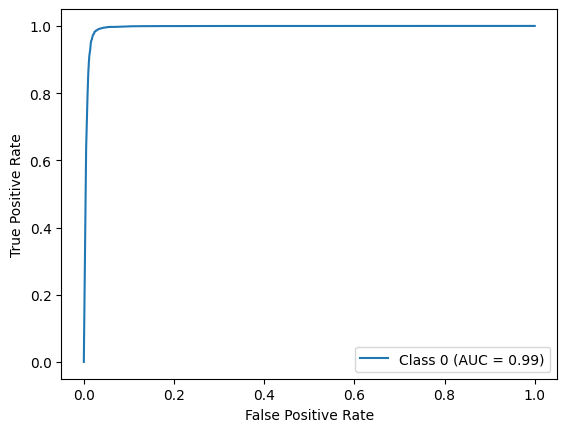

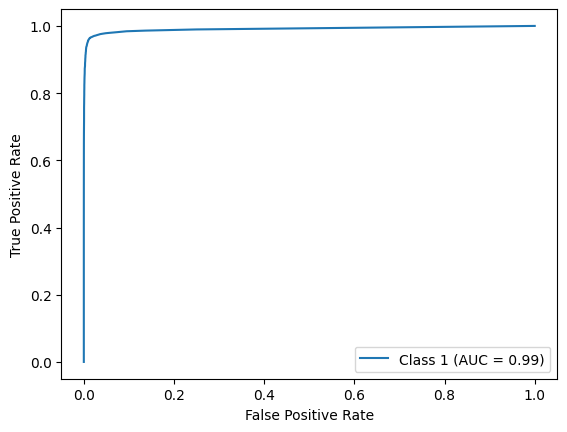

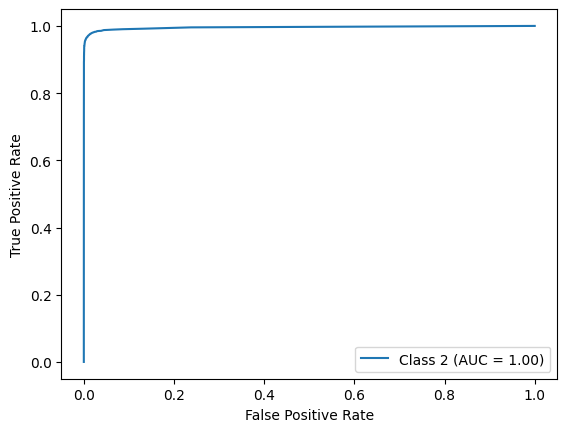

In [ ]:
#8/ Build and display the ROC curve of the random forest in #7. You can refer to this code for example: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html

from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay
from sklearn.metrics import auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize
y_bin_train = label_binarize(y_train, classes=[0, 1, 2])
y_bin_test = label_binarize(y_test, classes=[0, 1, 2])

#Random Forest classifier
rf_clf.fit(X_train, y_train)

# probability scores
y_score = rf_clf.predict_proba(X_test)

# ROC curve class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 3

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot: ROC curve for each class
for i in range(n_classes):
    RocCurveDisplay(fpr=fpr[i], tpr=tpr[i], roc_auc=roc_auc[i],
                    estimator_name=f'Class {i}').plot()

plt.show()


In [ ]:
#9/ Which are the most important 20 features of the Random Forest ? Are they the one that had the best correlations in question #2


feature_importances = rf_clf.feature_importances_


importances_series = pd.Series(feature_importances, index=my_df2.drop(columns='class').columns)

# Sort features based on importance
sorted_importances = importances_series.sort_values(ascending=False)

#top 20 features
top_20_features = sorted_importances.head(20)

print(top_20_features)

resolvedr        0.235709
resolvedr        0.227566
psf_z            0.050088
psf_z            0.049096
psf_u            0.046087
psf_g            0.030613
psf_u            0.029760
psf_i            0.029657
psf_i            0.028992
w1               0.026979
w1               0.025700
psf_u psf_g      0.024848
w3               0.021051
w3               0.020763
psf_r            0.019764
psf_r            0.018518
psf_u psf_i      0.016636
psf_g            0.015847
w2               0.015781
psf_u^2 psf_z    0.014953
dtype: float64


Betweem the two feature list, the overlapping features are:
```
'psf_u psf_g', 'psf_u psf_i', 'psf_u psf_z', 'psf_u^2 psf_z', 'resolvedr'
```

In [ ]:
#10 Build a new random forest that uses only these 20 features. Use a RandomizedSearchCV to optimize the hyper parameters of the Random Forest using AUC. Compare its performance with #7

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer


X_train_top_features = X_train[top_20_features.index]
X_test_top_features = X_test[top_20_features.index]

# parameter grid
param_distributions = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

#Random Forest classifier
rf_clf_top_features = RandomForestClassifier(random_state=42)

#RandomizedSearchCV
random_search = RandomizedSearchCV(
    rf_clf_top_features,
    param_distributions=param_distributions,
    n_iter=100,  # number of sampled parameter
    cv=5,
    scoring=make_scorer(roc_auc_score, needs_proba=True, multi_class='ovr'),
    random_state=42,
    n_jobs=-1,
    verbose=2
)

#RandomizedSearchCV
random_search.fit(X_train_top_features, y_train)

#best estimator
best_rf_clf = random_search.best_estimator_

# Fit the best estimator to the training data
best_rf_clf.fit(X_train_top_features, y_train)

#prediction probabilities
y_score_top_features = best_rf_clf.predict_proba(X_test_top_features)

#AUC score
roc_auc_top_features = roc_auc_score(y_bin_test, y_score_top_features, multi_class='ovr')


Fitting 5 folds for each of 100 candidates, totalling 500 fits
